**Q1:** **Import Libraries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.**

In [2]:
df = pd.read_csv("C:/Users/Testbook/Downloads/Lab 4 - Unsu[ervised learinng/marketing.csv")

In [3]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [4]:
print(df.shape)
print(df.info)

(2240, 27)
<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0   

**Q3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.**

In [5]:
missing_values = df.isnull().sum()
total_rows = len(df)
percentage_of_missing_values = (missing_values/total_rows)*100
print(percentage_of_missing_values)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


**Q4. Check if there are any duplicate records in the dataset, If any drop them.**


In [6]:
duplicates = df.drop_duplicates()
print(duplicates)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0    4/9/2012       58       635  ...          

**Q5. Drop the columns which you think redundant for the analysis** 

In [7]:
df = df.drop(columns=['Dt_Customer', 'ID'])


In [8]:
print(df.head())

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation       Together  71613.0        0         0       26   
3        1984  Graduation       Together  26646.0        1         0       26   
4        1981         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0       635         88              546  ...                   10   
1        11          1                6  ...                    1   
2       426         49              127  ...                    2   
3        11          4               20  ...                    0   
4       173         43              118  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4       

**Q6. Check the unique categories in the column 'Marital_Status'****
- i) Group categories 'Married', 'Together' as 'relationship**'**
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single**'.

In [9]:
uniques = df['Marital_Status'].unique
print(uniques)

<bound method Series.unique of 0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: object>


In [10]:
df['Marital_Status'] = df['Marital_Status'].replace({'Married': 'relationship', 'Together': 'relationship'})
df['Marital_Status'] = df['Marital_Status'].replace({'Divorced': 'Single','Widow': 'Single','Alone': 'Single','Absurd': 'Single','YOlO':'Single'})
print(df['Marital_Status'])


0             Single
1             Single
2       relationship
3       relationship
4       relationship
            ...     
2235    relationship
2236    relationship
2237          Single
2238    relationship
2239    relationship
Name: Marital_Status, Length: 2240, dtype: object


**Q7 Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'**

In [11]:
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print(df['Total_Expenses'])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64


**Q8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'**

In [12]:
df['Num_Total_Purchases'] = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']].sum(axis=1)
print(df['Num_Total_Purchases'])

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64


**Q9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'**

In [13]:
df['Kids'] = df[['Kidhome','Teenhome']].sum(axis=1)
print(df['Kids'])

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64


**Q10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'**

In [14]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
print(df['TotalAcceptedCmp'])

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64


**Q11. Drop those columns which we have used above for obtaining new features**

In [15]:
df = df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Kidhome','Teenhome','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
print(df.head())

   Year_Birth   Education Marital_Status   Income  Recency  NumWebVisitsMonth  \
0        1957  Graduation         Single  58138.0       58                  7   
1        1954  Graduation         Single  46344.0       38                  5   
2        1965  Graduation   relationship  71613.0       26                  4   
3        1984  Graduation   relationship  26646.0       26                  6   
4        1981         PhD   relationship  58293.0       94                  5   

   Complain  Response  Total_Expenses  Num_Total_Purchases  Kids  \
0         0         1            1617                   25     0   
1         0         0              27                    6     2   
2         0         0             776                   21     0   
3         0         0              53                    8     1   
4         0         0             422                   19     1   

   TotalAcceptedCmp  
0                 1  
1                 0  
2                 0  
3               

In [16]:
import datetime

# Get the current date and time
current_datetime = datetime.datetime.now()

# Extract the current year
current_year = current_datetime.year

print(f"The current year is: {current_year}")


# Extract age from 'Year_Birth' column
df['Age'] = current_year - df['Year_Birth']

# Drop the 'Year_Birth' column
df = df.drop(columns=['Year_Birth'])


The current year is: 2024


In [18]:
print(df.head())

    Education Marital_Status   Income  Recency  NumWebVisitsMonth  Complain  \
0  Graduation         Single  58138.0       58                  7         0   
1  Graduation         Single  46344.0       38                  5         0   
2  Graduation   relationship  71613.0       26                  4         0   
3  Graduation   relationship  26646.0       26                  6         0   
4         PhD   relationship  58293.0       94                  5         0   

   Response  Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp  Age  
0         1            1617                   25     0                 1   67  
1         0              27                    6     2                 0   70  
2         0             776                   21     0                 0   59  
3         0              53                    8     1                 0   40  
4         0             422                   19     1                 0   43  


**Q13. Encode the categorical variables in the dataset**

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



df = pd.DataFrame(df)

# Ensure categorical columns are of type string (if not already)
df['Education'] = df['Education'].astype(str)
df['Marital_Status'] = df['Marital_Status'].astype(str)

# Initialize LabelEncoder
lbl_encode = LabelEncoder()

# List of categorical columns to encode
cate = ['Education', 'Marital_Status']

# Apply LabelEncoder to each column
for col in cate:
    df[col] = lbl_encode.fit_transform(df[col])

print(df)


      Education  Marital_Status   Income  Recency  NumWebVisitsMonth  \
0             2               0  58138.0       58                  7   
1             2               0  46344.0       38                  5   
2             2               2  71613.0       26                  4   
3             2               2  26646.0       26                  6   
4             4               2  58293.0       94                  5   
...         ...             ...      ...      ...                ...   
2235          2               2  61223.0       46                  5   
2236          4               2  64014.0       56                  7   
2237          2               0  56981.0       91                  6   
2238          3               2  69245.0        8                  3   
2239          4               2  52869.0       40                  7   

      Complain  Response  Total_Expenses  Num_Total_Purchases  Kids  \
0            0         1            1617                   25   

**Q14. Standardize the columns, so that values are in a particular range**

In [21]:
from sklearn.preprocessing import StandardScaler
df1 = df.copy()
scaled_features= StandardScaler().fit_transform(df1.values)
scaled_features = pd.DataFrame(scaled_features, index = df1.index, columns = df1.columns)

In [81]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.DataFrame(df)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(df)

# Convert standardized data back to DataFrame
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)

# Display the standardized DataFrame
print("Standardized Dataarame (StandardScaler):")
print(df_standardized)

Standardized Dataarame (StandardScaler):
      Education  Marital_Status    Income   Recency  NumWebVisitsMonth  \
0     -0.787809       -1.346889  0.234063  0.307039           0.693904   
1     -0.787809       -1.346889 -0.234559 -0.383664          -0.130463   
2     -0.787809        0.736696  0.769478 -0.798086          -0.542647   
3     -0.787809        0.736696 -1.017239 -0.798086           0.281720   
4      1.072700        0.736696  0.240221  1.550305          -0.130463   
...         ...             ...       ...       ...                ...   
2235  -0.787809        0.736696  0.356642 -0.107383          -0.130463   
2236   1.072700        0.736696  0.467539  0.237969           0.693904   
2237  -0.787809       -1.346889  0.188091  1.446700           0.281720   
2238   0.142445        0.736696  0.675388 -1.419719          -0.954831   
2239   1.072700        0.736696  0.024705 -0.314594           0.693904   

      Complain  Response  Total_Expenses  Num_Total_Purchases      Kid

**Q15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.**

In [22]:
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01243073,         nan, -0.01173369, -0.04029882,
        -0.05056252,  0.09086006,  0.09209518,  0.09405439,  0.05321304,
         0.06327892,  0.17146685],
       [-0.01243073,  1.00044663,         nan, -0.00600029,  0.00447736,
        -0.00529951, -0.14933796, -0.01804797,  0.007219  ,  0.03926773,
        -0.06003259, -0.00456858],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [-0.01173369, -0.00600029,         nan,  1.00044663, -0.02145427,
         0.01323699, -0.19852527,  0.02044173,  0.00574294,  0.01806145,
        -0.08900203,  0.01987996],
       [-0.04029882,  0.00447736,         nan, -0.02145427,  1.00044663,
         0.01977734, -0.00398838, -0.50044131, -0.31242795,  0.41860616,
        -0.12836726, -0.12119336],
       [-0.05056252, -0.00529951,         nan,  0.01323699,  0.01977734,
         1.00044663, -

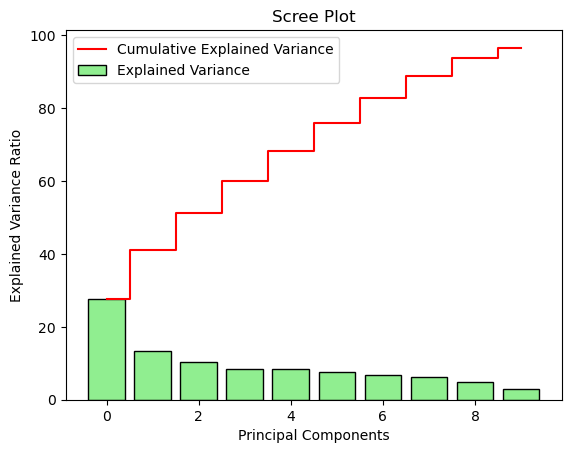

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Assuming df is your dataframe
df1 = df.copy()

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'median', 'most_frequent', or 'constant' as well
df1_imputed = imputer.fit_transform(df1.values)

# Scale the features
scaled_features = StandardScaler().fit_transform(df1_imputed)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)
eig_vals = pca.explained_variance_

# Calculate explained variance and cumulative explained variance
total = sum(eig_vals)
var_exp = [(i / total) * 100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

# Plotting the scree plot for the first 10 components or up to the number of components if less than 10
num_components = min(10, len(eig_vals))

plt.bar(range(num_components), var_exp[:num_components], align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(num_components), cum_var_exp[:num_components], where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()


**Q16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)**

In [29]:
# Using the dimensions obtained from the PCA to apply clustering (i.e., 8 components)
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.514325,-1.552339,0.318201,0.981064,-0.886404,0.199466,-1.105991,0.083926
1,-1.571369,0.097692,1.035807,0.665269,-0.709478,-1.314297,-0.880970,0.610945
2,1.117953,0.996039,-0.581080,-0.629267,0.822096,-0.760299,-0.088673,0.170417
3,-1.787528,-0.388468,-1.064651,-0.856060,0.647832,-0.304908,0.552207,-0.145407
4,-0.108602,1.065627,0.173991,-0.347933,-0.474429,1.519361,1.438591,-0.753015


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
cluster_errors = []
cluster_range = range(2, 15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state = 100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)
    

C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Testbook\anaconda3\Lib\site-package

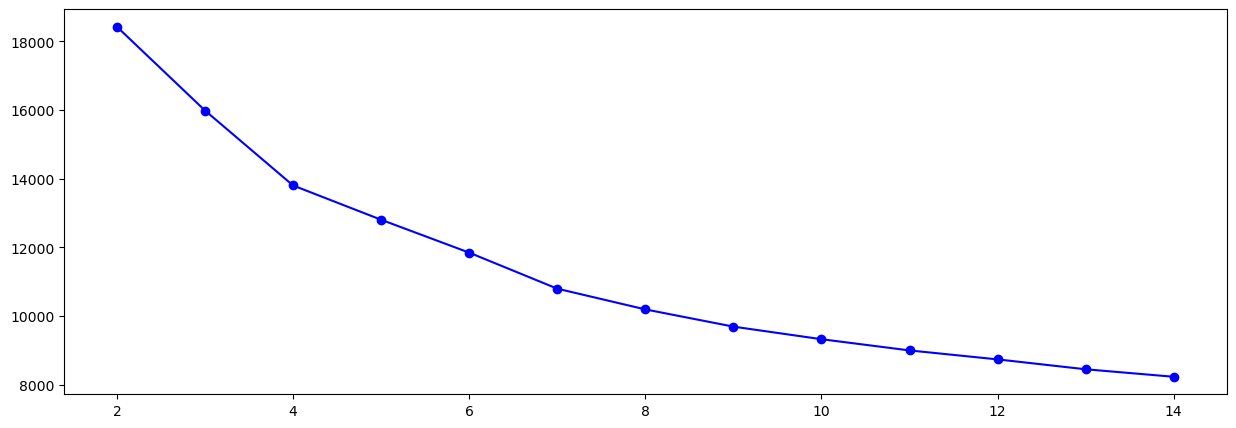

In [32]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
plt.figure(figsize=[15, 5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, random_state = 100)
kmeans.fit(pca_df)

C:\Users\Testbook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=100)

In [35]:
label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [36]:
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.514325,-1.552339,0.318201,0.981064,-0.886404,0.199466,-1.105991,0.083926,1
1,-1.571369,0.097692,1.035807,0.665269,-0.709478,-1.314297,-0.880970,0.610945,2
2,1.117953,0.996039,-0.581080,-0.629267,0.822096,-0.760299,-0.088673,0.170417,0
3,-1.787528,-0.388468,-1.064651,-0.856060,0.647832,-0.304908,0.552207,-0.145407,2
4,-0.108602,1.065627,0.173991,-0.347933,-0.474429,1.519361,1.438591,-0.753015,0


In [37]:
kmeans_df['Label'].value_counts()

Label
2    1171
0     800
1     269
Name: count, dtype: int64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pca_df contains the principal components and cluster labels
pca_df['Label'] = labels  # Ensure 'Label' column exists with cluster labels

# Plotting the scatter plot for the first two principal components with cluster labels
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette='viridis')
plt.title('Scatter Plot of PC1 vs PC2 with Cluster Labels')
plt.show()


NameError: name 'labels' is not defined

In [40]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

NameError: name 'linkage' is not defined

<Figure size 1800x500 with 0 Axes>

**Q17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for i in range(2, 15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

In [ ]:
##building hierarchical clustering model using the optimal clusters as 3 using original data 
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage = 'ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [41]:
## Creating a dataframe of the labels 
df_label1 = pd.DataFrame(hie_cluster_model.lables_columns=['Labels'])
df_label1.head(5)

NameError: name 'df_label1' is not defined